In [3]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data Files
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Merge the data into one dataset
combined_df = pd.merge(ride_df, city_df, on="city", how="inner")

# Display the data table for preview
combined_df = combined_df.sort_values("date", ascending=True)
combined_df.head()

,city,date,fare,ride_id,driver_count,type
1313,Liumouth,2018-01-01 00:08:16,37.91,5673666505216,69,Urban
2161,Colemanland,2018-01-01 00:46:46,47.74,2215912677020,23,Suburban
2022,Sotoville,2018-01-01 02:07:24,24.07,7827431948090,10,Suburban
1225,Royland,2018-01-01 03:46:50,7.57,5815378003370,64,Urban
583,West Heidi,2018-01-01 05:23:21,10.75,6571513080673,28,Urban


In [4]:
# Create dataframes for the city type driving 'urban', 'surburban', 'rural'
df_urban = combined_df.loc[combined_df["type"] == "Urban"]
df_suburban = combined_df.loc[combined_df["type"] == "Suburban"]
df_rural = combined_df.loc[combined_df["type"] == "Rural"]

## Bubble Plot of Ride Sharing Data

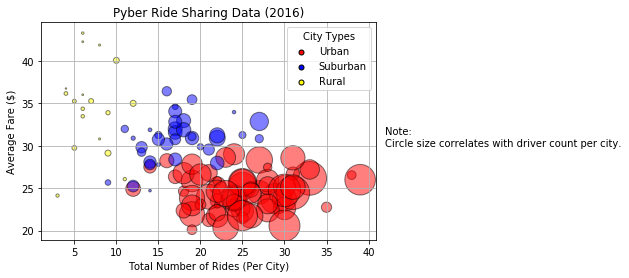

In [5]:
# Obtain the x and y coordinates for each of the three city types
# Urban Type
nRides_urban = df_urban.groupby("city")["fare"].count()
avgFare_urban = df_urban.groupby("city")["fare"].mean()
sumDrivers_urban = df_urban.groupby("city")["driver_count"].sum()
# Surburban Type
nRides_suburban = df_suburban.groupby("city")["fare"].count()
avgFare_suburban = df_suburban.groupby("city")["fare"].mean()
sumDrivers_suburban = df_suburban.groupby("city")["driver_count"].sum()
# rural
nRides_rural = df_rural.groupby("city")["fare"].count()
avgFare_rural = df_rural.groupby("city")["fare"].mean()
sumDrivers_rural = df_rural.groupby("city")["driver_count"].sum()

# Build the scatter plots for each city types
facSize = .5
transparency = .5
plt.scatter(nRides_urban, avgFare_urban, facecolor="red", edgecolors="black", alpha=transparency, s=sumDrivers_urban*facSize)
plt.scatter(nRides_suburban, avgFare_suburban, facecolor="blue", edgecolors="black", alpha=transparency, s=sumDrivers_suburban*facSize)
plt.scatter(nRides_rural, avgFare_rural, facecolor="yellow", edgecolors="black", alpha=transparency, s=sumDrivers_rural*facSize)
plt.grid(True)
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")

# Create a legend
plt.rcParams["legend.markerscale"] = .75
lgnd = plt.legend(["Urban", "Suburban", "Rural"], title="City Types")
for i in lgnd.legendHandles:
    i._sizes = [25]
    i.set_alpha(1)

# Incorporate a text label regarding circle size
plt.text(x=42, y=30, s="""Note:
Circle size correlates with driver count per city.""")

# Save Figure
plt.savefig("../Images/MyScatter_Pyber.png")


## Total Fares by City Type

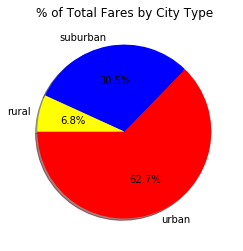

In [9]:
# Calculate Type Percents
all_fares = combined_df["fare"].sum()
fares_urban = df_urban["fare"].sum()
fares_suburban = df_suburban["fare"].sum()
fares_rural = df_rural["fare"].sum()

# Build Pie Chart
colors = ["red", "blue", "yellow"]
labels = ["urban", "suburban", "rural"]
fig = plt.pie([fares_urban, fares_suburban, fares_rural], 
              labels=labels, autopct="%1.1f%%", startangle=180, colors=colors, 
              shadow=True)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("../Images/MyPie1_Pyber.png")

## Total Rides by City Type

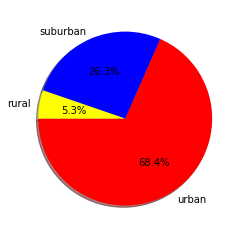

In [12]:
# Calculate Ride Percents
rides_urban = len(df_urban)
rides_suburban = len(df_suburban)
rides_rural = len(df_rural)

# Build Pie Chart
fig = plt.pie([rides_urban, rides_suburban, rides_rural],
              labels=labels, autopct="%1.1f%%", startangle=180, colors=colors, 
              shadow=True)


# Save Figure
plt.savefig("../Images/MyPie2_Pyber.png")


## Total Drivers by City Type

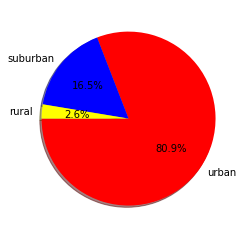

In [14]:
# Calculate Driver Percents
Drivers_urban = df_urban.groupby("city")["driver_count"].mean().sum()
Drivers_suburban = df_suburban.groupby("city")["driver_count"].mean().sum()
Drivers_rural = df_rural.groupby("city")["driver_count"].mean().sum()

# Build Pie Charts
fig = plt.pie([Drivers_urban, Drivers_suburban, Drivers_rural],
              labels=labels, autopct="%1.1f%%", startangle=180, colors=colors, 
              shadow=True)

# Save Figure
plt.savefig("../Images/MyPie3_Pyber.png")